In [83]:
import matplotlib.pyplot as plt
import pandas as pd

#import data
price_data = pd.read_csv('Price_Data_csv.csv')
price_data.dtypes

time                       float64
ema(4)                     float64
high low span              float64
high above ema             float64
close above ema            float64
close relative to high     float64
volume change              float64
volume relative to span    float64
to buy                     float64
dtype: object

In [84]:
#split into x and y 
X = price_data.drop("to buy", axis=1)
y = price_data["to buy"].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
# Use our model to make predictions
predicted = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Overall Score for the model

training_r2 = model.score(X_train, y_train)
testing_r2 = model.score(X_test, y_test) 

print(f"Training R2 Score: {training_r2}")
print(f"Testing R2 Score: {testing_r2}")

# Score the predictions with mse and r2
testing_mse = mean_squared_error(y_test, predicted)

print(f"Testing Mean Squared Error (MSE): {testing_mse}")

Training R2 Score: 0.11714626914266667
Testing R2 Score: 0.10264632241196092
Testing Mean Squared Error (MSE): 1.3903490354068885e-06


Text(0.5, 1.0, 'Residual Plot')

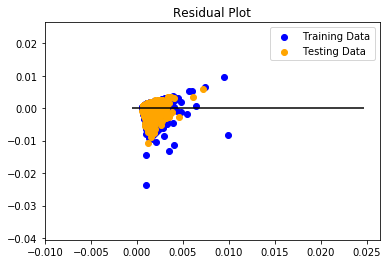

In [88]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")